# Airbnb Recommendation System - Tokyo

# Business Problem
Airbnb wants to know which properties were popular in Tokyo and use that data to create more. 
Users also want to see which one to stay at.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

Detailed Review Data

In [2]:
file_path = file_path = '/Users/harshithathota/Documents/Capstone/data/reviews 2.csv'

reviews_df = pd.read_csv(file_path)

In [3]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451682 entries, 0 to 451681
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     451682 non-null  int64 
 1   id             451682 non-null  int64 
 2   date           451682 non-null  object
 3   reviewer_id    451682 non-null  int64 
 4   reviewer_name  451681 non-null  object
 5   comments       451638 non-null  object
dtypes: int64(3), object(3)
memory usage: 20.7+ MB


In [4]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,197677,554285,2011-09-21,1002142,Pablo,Couldn’t get any better!\r<br/>\r<br/>The apar...
1,197677,627651,2011-10-14,1031940,Ana & Ricardo,The apartment is bigger than it looks in the p...
2,197677,733040,2011-11-21,1097040,Samuel,The appartement is perfect for a couple! It is...
3,197677,755841,2011-11-30,1183674,Lisa,We had a terrific stay at Yoshimi and Marek's ...
4,197677,852938,2012-01-09,1538004,Langan,We loved our stay at the Oshiage Holiday Apart...


Detailed Listings data

In [5]:
listings = '/Users/harshithathota/Documents/Capstone/data/listings (1).csv'
listings = pd.read_csv(listings)


In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            12234 non-null  int64  
 1   listing_url                                   12234 non-null  object 
 2   scrape_id                                     12234 non-null  int64  
 3   last_scraped                                  12234 non-null  object 
 4   source                                        12234 non-null  object 
 5   name                                          12234 non-null  object 
 6   description                                   12234 non-null  object 
 7   neighborhood_overview                         8400 non-null   object 
 8   picture_url                                   12234 non-null  object 
 9   host_id                                       12234 non-null 

In [7]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,https://www.airbnb.com/rooms/197677,20230924051543,2023-09-24,city scrape,Rental unit in Sumida · ★4.77 · 1 bedroom · 2 ...,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,...,4.83,4.53,4.79,M130003350,f,1,1,0,0,1.19
1,5240174,https://www.airbnb.com/rooms/5240174,20230924051543,2023-09-24,previous scrape,Rental unit in Shibuya-ku · ★4.52 · Studio · 1...,Minimalist simple grey-color interior room. My...,NaN,https://a0.muscache.com/pictures/b0b55fef-80cb...,24477517,...,4.83,4.29,4.30,M130005396,t,4,4,0,0,1.89
2,5262640,https://www.airbnb.com/rooms/5262640,20230924051543,2023-09-24,city scrape,Rental unit in Nakano-ku · ★4.80 · 1 bedroom ·...,It takes 5 min walk to Fujimidai Sta.. You can...,No smoking in the room<br />No outdoor shoes a...,https://a0.muscache.com/pictures/281f8d6f-eb4a...,17736560,...,4.87,4.61,4.77,Hotels and Inns Business Act | 中野区保健所 | 30中環生環...,f,9,9,0,0,0.59
3,776070,https://www.airbnb.com/rooms/776070,20230924051543,2023-09-24,city scrape,Home in Kita-ku · ★4.98 · 1 bedroom · 1 bed · ...,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://a0.muscache.com/pictures/efd9f039-dbd2...,801494,...,4.98,4.84,4.91,M130000243,f,1,0,1,0,1.88
4,905944,https://www.airbnb.com/rooms/905944,20230924051543,2023-09-24,city scrape,Rental unit in Shibuya · ★4.77 · 2 bedrooms · ...,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,https://a0.muscache.com/pictures/miso/Hosting-...,4847803,...,4.91,4.78,4.78,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...,t,5,5,0,0,1.52


Summary information and metrics for listings in Tokyo (good for visualisations).

In [8]:
list = list = '/Users/harshithathota/Documents/Capstone/data/listings.csv'
list = pd.read_csv(list)
list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12234 non-null  int64  
 1   name                            12234 non-null  object 
 2   host_id                         12234 non-null  int64  
 3   host_name                       12234 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12234 non-null  object 
 6   latitude                        12234 non-null  float64
 7   longitude                       12234 non-null  float64
 8   room_type                       12234 non-null  object 
 9   price                           12234 non-null  int64  
 10  minimum_nights                  12234 non-null  int64  
 11  number_of_reviews               12234 non-null  int64  
 12  last_review                     

In [9]:
list.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Rental unit in Sumida · ★4.77 · 1 bedroom · 2 ...,964081,Yoshimi & Marek,NaN,Sumida Ku,35.717070,139.826080,Entire home/apt,12000,3,174,2023-08-13,1.19,1,39,8,M130003350
1,776070,Home in Kita-ku · ★4.98 · 1 bedroom · 1 bed · ...,801494,Kei,NaN,Kita Ku,35.738440,139.769170,Private room,8902,3,248,2023-08-27,1.88,1,116,18,M130000243
2,905944,Rental unit in Shibuya · ★4.77 · 2 bedrooms · ...,4847803,Best Stay In Tokyo!,NaN,Shibuya Ku,35.678780,139.678470,Entire home/apt,23740,3,194,2023-09-11,1.52,5,166,9,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...
3,1016831,Home in Setagaya · ★4.94 · 1 bedroom · 2 beds ...,5596383,Wakana,NaN,Setagaya Ku,35.658000,139.671340,Private room,24000,30,256,2023-09-18,2.01,1,53,45,M130001107
4,1196177,Home in 足立区 · ★4.73 · 1 bedroom · 1.5 shared b...,5686404,Yukiko,NaN,Adachi Ku,35.744731,139.797384,Private room,5200,2,100,2023-09-19,0.81,1,112,5,M130007760


Neighbourhood list for geo filter. Sourced from city or open source GIS files.

In [10]:
area = area = '/Users/harshithathota/Documents/Capstone/data/neighbourhoods.csv'
area = pd.read_csv(area)
area.head()

,neighbourhood_group,neighbourhood
0,NaN,Adachi Ku
1,NaN,Akiruno Shi
2,NaN,Akishima Shi
3,NaN,Aogashima Mura
4,NaN,Arakawa Ku


Detailed Calendar Data

In [11]:
calendar = calendar = '/Users/harshithathota/Documents/Capstone/data/calendar.csv'
calendar = pd.read_csv(calendar)


In [12]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,197677,2023-09-24,f,"$12,000.00","$12,000.00",3,1125
1,197677,2023-09-25,f,"$12,000.00","$12,000.00",3,1125
2,197677,2023-09-26,f,"$12,000.00","$12,000.00",3,1125
3,197677,2023-09-27,f,"$12,000.00","$12,000.00",3,1125
4,197677,2023-09-28,f,"$12,000.00","$12,000.00",3,1125


Reviews = Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).

In [13]:
df = df= '/Users/harshithathota/Documents/Capstone/data/reviews.csv'
df = pd.read_csv(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451682 entries, 0 to 451681
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  451682 non-null  int64 
 1   date        451682 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.9+ MB


In [14]:
df.head()

,listing_id,date
0,197677,2011-09-21
1,197677,2011-10-14
2,197677,2011-11-21
3,197677,2011-11-30
4,197677,2012-01-09


* We only need the reviews and listings datasets

In [15]:
#merged_df = pd.merge(listings, reviews_df, left_on='id', right_on='listing_id', how='inner')
#merged_df.info()
merged_df = pd.merge(reviews_df, listings, left_on='listing_id', right_on='id', how='left')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451682 entries, 0 to 451681
Data columns (total 81 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   listing_id                                    451682 non-null  int64  
 1   id_x                                          451682 non-null  int64  
 2   date                                          451682 non-null  object 
 3   reviewer_id                                   451682 non-null  int64  
 4   reviewer_name                                 451681 non-null  object 
 5   comments                                      451638 non-null  object 
 6   id_y                                          451682 non-null  int64  
 7   listing_url                                   451682 non-null  object 
 8   scrape_id                                     451682 non-null  int64  
 9   last_scraped                                  45

In [16]:
merged_df.head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,554285,2011-09-21,1002142,Pablo,Couldn’t get any better!\r<br/>\r<br/>The apar...,197677,https://www.airbnb.com/rooms/197677,20230924051543,2023-09-24,...,4.83,4.53,4.79,M130003350,f,1,1,0,0,1.19
1,197677,627651,2011-10-14,1031940,Ana & Ricardo,The apartment is bigger than it looks in the p...,197677,https://www.airbnb.com/rooms/197677,20230924051543,2023-09-24,...,4.83,4.53,4.79,M130003350,f,1,1,0,0,1.19
2,197677,733040,2011-11-21,1097040,Samuel,The appartement is perfect for a couple! It is...,197677,https://www.airbnb.com/rooms/197677,20230924051543,2023-09-24,...,4.83,4.53,4.79,M130003350,f,1,1,0,0,1.19
3,197677,755841,2011-11-30,1183674,Lisa,We had a terrific stay at Yoshimi and Marek's ...,197677,https://www.airbnb.com/rooms/197677,20230924051543,2023-09-24,...,4.83,4.53,4.79,M130003350,f,1,1,0,0,1.19
4,197677,852938,2012-01-09,1538004,Langan,We loved our stay at the Oshiage Holiday Apart...,197677,https://www.airbnb.com/rooms/197677,20230924051543,2023-09-24,...,4.83,4.53,4.79,M130003350,f,1,1,0,0,1.19


In [17]:
merged_df.isna().sum()

listing_id                                      0
id_x                                            0
date                                            0
reviewer_id                                     0
reviewer_name                                   1
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 81, dtype: int64

# Data Cleaning

In [18]:
# some of the reviews are from 2011, we only want the recent ones
merged_df['date'].value_counts()

date
2023-07-30    931
2023-08-14    850
2023-07-17    848
2023-05-06    832
2023-05-07    829
             ... 
2014-12-20      1
2013-12-15      1
2014-01-10      1
2014-01-18      1
2011-09-21      1
Name: count, Length: 3682, dtype: int64

In [19]:
merged_df['listing_id'].value_counts()

listing_id
27750681              2023
49084102               971
44125369               966
44637473               782
25377337               779
                      ... 
41653901                 1
41805631                 1
924340394945850701       1
41573195                 1
983031277017558192       1
Name: count, Length: 10776, dtype: int64

In [20]:
merged_df['property_type'].value_counts()

property_type
Entire rental unit                    246883
Entire home                            64144
Private room in home                   21650
Private room in rental unit            16571
Entire condo                           13891
Room in hotel                          13041
Room in aparthotel                     12902
Room in boutique hotel                 12768
Entire serviced apartment               8245
Private room in hostel                  5816
Entire villa                            4639
Room in hostel                          4053
Private room in serviced apartment      3736
Shared room in hostel                   3608
Shared room in rental unit              2403
Entire loft                             2233
Private room in condo                   1478
Private room in guesthouse              1473
Entire townhouse                        1281
Hut                                     1257
Room in ryokan                          1034
Shared room in home                      

In [21]:
merged_df['number_of_reviews'].value_counts

<bound method IndexOpsMixin.value_counts of 0         174
1         174
2         174
3         174
4         174
         ... 
451677      3
451678      1
451679      2
451680      2
451681      1
Name: number_of_reviews, Length: 451682, dtype: int64>

In [24]:
# we only want the recently reviewed airbnbs by date 
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Filter by date since April 29, 2023
filtered_df = merged_df[merged_df['date'] >= '2023-04-29'].copy()

# drop unnecessary columns
col = ['id_x', 'id_y', 'source', 'reviewer_id', 'host_id', 'host_name', 'calculated_host_listings_count', 'availability_365', 'host_id', 'host_url',
       'host_listings_count', 'host_total_listings_count', 'scrape_id', 'last_scraped',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed',  'minimum_nights',
       'calendar_updated', 
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped',
       'first_review', 'last_review',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'license', 'instant_bookable',
       'calculated_host_listings_count', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
       'reviews_per_month', 'host_since', 'host_location', 'host_thumbnail_url', 'host_picture_url','host_neighbourhood',
       'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'                                           
       ]

filtered_df.drop(col, axis=1, inplace=True)

In [25]:
# sanity check
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85911 entries, 283 to 451681
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   listing_id              85911 non-null  int64         
 1   date                    85911 non-null  datetime64[ns]
 2   reviewer_name           85911 non-null  object        
 3   comments                85900 non-null  object        
 4   listing_url             85911 non-null  object        
 5   name                    85911 non-null  object        
 6   description             85911 non-null  object        
 7   neighborhood_overview   61691 non-null  object        
 8   picture_url             85911 non-null  object        
 9   neighbourhood           61691 non-null  object        
 10  neighbourhood_cleansed  85911 non-null  object        
 11  latitude                85911 non-null  float64       
 12  longitude               85911 non-null  float64 

In [27]:
filtered_df['property_type'].value_counts()

property_type
Entire rental unit                    46693
Entire home                           10682
Room in hotel                          3441
Private room in rental unit            3283
Private room in home                   3144
Room in boutique hotel                 3108
Entire condo                           2761
Room in aparthotel                     2632
Entire serviced apartment              2341
Private room in hostel                 1374
Entire villa                            911
Room in hostel                          792
Private room in serviced apartment      672
Shared room in hostel                   618
Shared room in hotel                    383
Entire loft                             338
Shared room in ryokan                   234
Private room in guesthouse              225
Private room in condo                   202
Private room in hut                     200
Shared room in rental unit              190
Hut                                     164
Room in serviced a

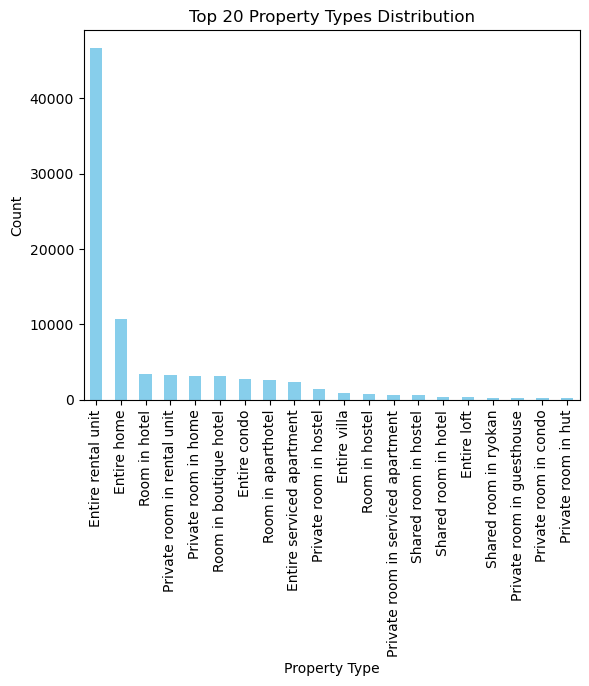

In [31]:
top20_property_types = filtered_df['property_type'].value_counts().nlargest(20)

top20_property_types.plot(kind='bar', color='skyblue')
plt.title('Top 20 Property Types Distribution')
plt.xlabel('Property Type')
plt.ylabel('Count')
#plt.xticks(rotation=0)
plt.show()

In [44]:
filtered_df['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Shinjuku Ku            16488
Taito Ku               13594
Sumida Ku              11581
Toshima Ku              6535
Shibuya Ku              6018
Minato Ku               3522
Ota Ku                  3167
Nakano Ku               3038
Setagaya Ku             2344
Chuo Ku                 2211
Koto Ku                 1989
Katsushika Ku           1706
Shinagawa Ku            1692
Kita Ku                 1608
Edogawa Ku              1568
Suginami Ku             1552
Bunkyo Ku               1365
Arakawa Ku              1363
Chiyoda Ku              1350
Itabashi Ku              850
Adachi Ku                415
Meguro Ku                360
Nerima Ku                341
Ome Shi                  151
Musashino Shi            119
Chofu Shi                102
Koganei Shi               93
Mitaka Shi                90
Machida Shi               80
Kokubunji Shi             71
Hachioji Shi              67
Hino Shi                  66
Nishitokyo Shi            65
Akiruno Shi         

In [ ]:
# Save master dataset
# filtered_df.to_csv('filtered_data.csv', index=False)